##World bank data
Making a interactive map

1. Pick a custom metric and analyze it

2. Make a map


In [ ]:
# Find how to locate the data
# Import Python Packages
import pandas as pd
from pandas_datareader import wb

In [ ]:
wb.download?

In [ ]:
# Pull population growth data from world bank in the url: https://data.worldbank.org/indicator/SP.POP.GROW?view=chart
# GDP indicators were down - check back another time
pop_growth = wb.download(country = "all",
            indicator = "SP.POP.GROW",
            start = 2020,
            end = 2020)

#check a look at the data, hierichal indexing
pop_growth.head()

,,SP.POP.GROW
country,year,
Africa Eastern and Southern,2020,2.605427
Africa Western and Central,2020,2.660902
Arab World,2020,1.918912
Caribbean small states,2020,0.552626
Central Europe and the Baltics,2020,-0.142072


In [ ]:
# Reset_index(()
pop_growth2 = pop_growth.reset_index()

# Change Columns name
pop_growth2.columns = ['country', 'year', 'value']

pop_growth2

,country,year,value
0,Africa Eastern and Southern,2020,2.605427
1,Africa Western and Central,2020,2.660902
2,Arab World,2020,1.918912
3,Caribbean small states,2020,0.552626
4,Central Europe and the Baltics,2020,-0.142072
...,...,...,...
261,Virgin Islands (U.S.),2020,-0.355937
262,West Bank and Gaza,2020,2.486550
263,"Yemen, Rep.",2020,2.251561
264,Zambia,2020,2.885686


In [ ]:
# Get data as Geographical Spatial in Python
# Install geopandas for reading in shapefiles
!pip install --upgrade geopandas

In [ ]:
# import geopandas package
import geopandas as gp 

In [ ]:
# Read in the Natrual Earth shape file
world = gp.read_file("/ne_50m_admin_0_countries.shp")

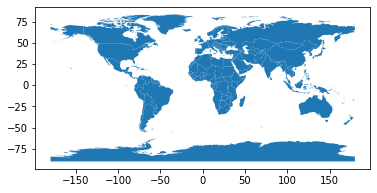

In [ ]:
# plot the data to make sure it worked
world.plot()

In [ ]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,Zimbabwe,ZWE,...,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,Vietnam,VNM,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,Venezuela,VEN,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


In [ ]:
for column in world.columns:
  print(column)

featurecla
scalerank
LABELRANK
SOVEREIGNT
SOV_A3
ADM0_DIF
LEVEL
TYPE
ADMIN
ADM0_A3
GEOU_DIF
GEOUNIT
GU_A3
SU_DIF
SUBUNIT
SU_A3
BRK_DIFF
NAME
NAME_LONG
BRK_A3
BRK_NAME
BRK_GROUP
ABBREV
POSTAL
FORMAL_EN
FORMAL_FR
NAME_CIAWF
NOTE_ADM0
NOTE_BRK
NAME_SORT
NAME_ALT
MAPCOLOR7
MAPCOLOR8
MAPCOLOR9
MAPCOLOR13
POP_EST
POP_RANK
POP_YEAR
GDP_MD
GDP_YEAR
ECONOMY
INCOME_GRP
FIPS_10
ISO_A2
ISO_A2_EH
ISO_A3
ISO_A3_EH
ISO_N3
ISO_N3_EH
UN_A3
WB_A2
WB_A3
WOE_ID
WOE_ID_EH
WOE_NOTE
ADM0_A3_IS
ADM0_A3_US
ADM0_A3_FR
ADM0_A3_RU
ADM0_A3_ES
ADM0_A3_CN
ADM0_A3_TW
ADM0_A3_IN
ADM0_A3_NP
ADM0_A3_PK
ADM0_A3_DE
ADM0_A3_GB
ADM0_A3_BR
ADM0_A3_IL
ADM0_A3_PS
ADM0_A3_SA
ADM0_A3_EG
ADM0_A3_MA
ADM0_A3_PT
ADM0_A3_AR
ADM0_A3_JP
ADM0_A3_KO
ADM0_A3_VN
ADM0_A3_TR
ADM0_A3_ID
ADM0_A3_PL
ADM0_A3_GR
ADM0_A3_IT
ADM0_A3_NL
ADM0_A3_SE
ADM0_A3_BD
ADM0_A3_UA
ADM0_A3_UN
ADM0_A3_WB
CONTINENT
REGION_UN
SUBREGION
REGION_WB
NAME_LEN
LONG_LEN
ABBREV_LEN
TINY
HOMEPART
MIN_ZOOM
MIN_LABEL
MAX_LABEL
NE_ID
WIKIDATAID
NAME_AR
NAME_BN
NAME_DE
NAME_EN


In [ ]:
# Use filter() to reduce the number of columns
world_sub = world.filter(['NAME', 'ISO_A2_EH', 'geometry'])
world_sub.head()

,NAME,ISO_A2_EH,geometry
0,Zimbabwe,ZW,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,ZM,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,YE,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Vietnam,VN,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Venezuela,VE,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


In [ ]:
pop_growth2.head()

,country,year,value
0,Africa Eastern and Southern,2020,2.605427
1,Africa Western and Central,2020,2.660902
2,Arab World,2020,1.918912
3,Caribbean small states,2020,0.552626
4,Central Europe and the Baltics,2020,-0.142072


In [ ]:
#Look at the iso2c code for all country
country_lookup = wb.get_countries()
country_codes = country_lookup.filter(["name","iso2c"])
country_codes.head()

,name,iso2c
0,Aruba,AW
1,Africa Eastern and Southern,ZH
2,Afghanistan,AF
3,Africa,A9
4,Africa Western and Central,ZI


In [ ]:
#Merge step 1: Merge country_codes to pop_growth2 
pop_growth_merged = pop_growth2.merge(country_codes,left_on  = "country", right_on ="name")

pop_growth_merged.head()

,country,year,value,name,iso2c
0,Africa Eastern and Southern,2020,2.605427,Africa Eastern and Southern,ZH
1,Africa Western and Central,2020,2.660902,Africa Western and Central,ZI
2,Arab World,2020,1.918912,Arab World,1A
3,Caribbean small states,2020,0.552626,Caribbean small states,S3
4,Central Europe and the Baltics,2020,-0.142072,Central Europe and the Baltics,B8


In [ ]:
# Merge step 2: Merge pop_growth_merged and world_sub
world_merged = world_sub.merge(pop_growth_merged, left_on= "ISO_A2_EH",
                              right_on = "iso2c")
world_merged.head()

,NAME,ISO_A2_EH,geometry,country,year,value,name,iso2c
0,Zimbabwe,ZW,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344...",Zimbabwe,2020,1.473871,Zimbabwe,ZW
1,Zambia,ZM,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643...",Zambia,2020,2.885686,Zambia,ZM
2,Yemen,YE,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16...","Yemen, Rep.",2020,2.251561,"Yemen, Rep.",YE
3,Vietnam,VN,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ...",Vietnam,2020,0.904518,Vietnam,VN
4,Venezuela,VE,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9...","Venezuela, RB",2020,-0.280539,"Venezuela, RB",VE


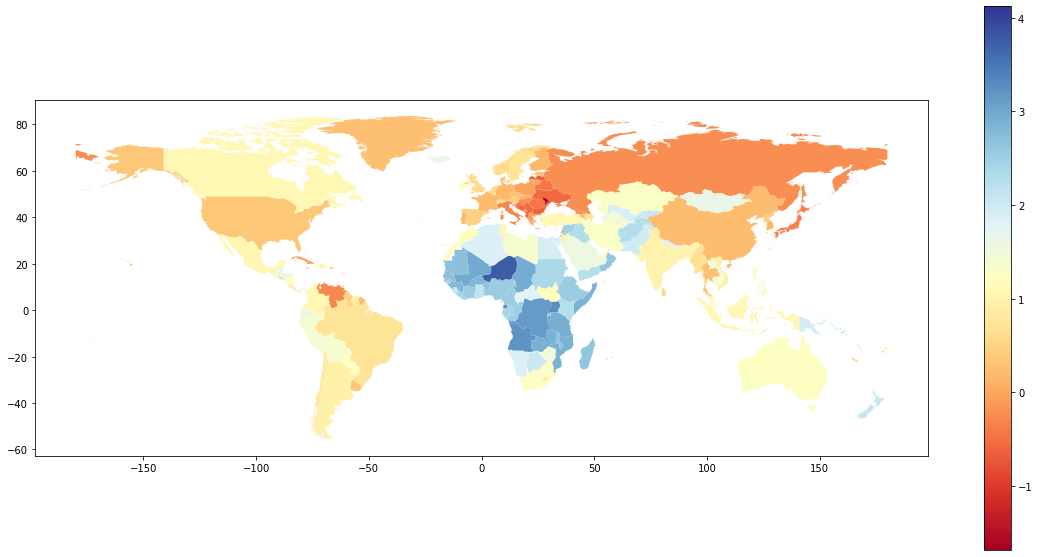

In [ ]:
# Make a map to see if this work.
# cmap: check COLORBREWER
world_merged.plot(column = "value", cmap = "RdYlBu", figsize = (20,10), legend = True)

In [ ]:
# Write to GeoJSON
world_merged.to_file("population_change.geojson")
